In [1]:
import torch
import numpy as np
from dptb.nn.dftb2nnsk import DFTB2NNSK
import matplotlib.pyplot as plt
from dptb.entrypoints.collectskf import skf2nnsk

In [2]:
skf2nnsk(INPUT = './input.json',
init_model = None,
output = './out',
log_level = 2
)

DEEPTB INFO    Loading skdata from ./H_B_C_N_O_Si.pth
DEEPTB INFO    Automatically determining basis
/Users/aisiqg/Software/venv/pydptb/lib/python3.9/site-packages/torch/_functorch/deprecated.py:61: UserWarning: We've integrated functorch into PyTorch. As the final step of the integration, functorch.vmap is deprecated as of PyTorch 2.0 and will be deleted in a future version of PyTorch >= 2.3. Please use torch.vmap instead; see the PyTorch 2.0 release notes and/or the torch.func migration guide for more details https://pytorch.org/docs/master/func.migrating.html
  warn_deprecated('vmap', 'torch.vmap')
DEEPTB INFO    Batch      0, subset [  0 16]: Loss 30.5737, Hop MAE  1.3657, Hop RMSE  2.9285, Ovl MAE  0.6059, Ovl RMSE  1.1461, LR 0.010000
DEEPTB INFO    Batch      0, subset [ 16 32]: Loss 29.2320, Hop MAE  1.2162, Hop RMSE  2.7151, Ovl MAE  0.5685, Ovl RMSE  1.1182, LR 0.010000
DEEPTB INFO    Batch      0, subset [ 32 36]: Loss 29.7914, Hop MAE  1.2224, Hop RMSE  2.6013, Ovl MAE  0.5

In [4]:
dft2nn = DFTB2NNSK.load(ckpt='./HBCNOSi.nnsk.model/best_df2sk.pth', skdata='./H_B_C_N_O_Si.pth',train_options=None)

DEEPTB INFO    Loading the skdict from the file: ./H_B_C_N_O_Si.pth ......


<Figure size 600x400 with 0 Axes>

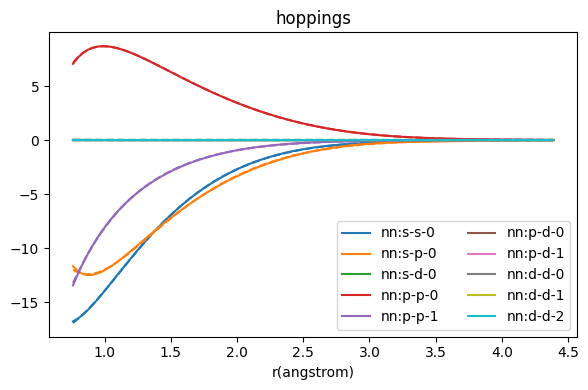

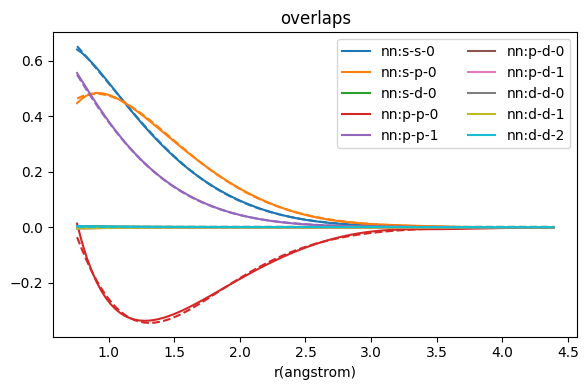

True

In [6]:
dft2nn.viz(atom_a='C',atom_b='C')

In [18]:
nnskf = dft2nn.to_nnsk(ebase=False)
nnskf.save('./HBCNOSi.nnsk.model/nnsk_skf.pth')

In [8]:
from dptb.nn.build import build_model
from dptb.utils.tools import j_loader
from dptb.postprocess.bandstructure.band import Band

# model = build_model('./HBCNOSi.nnsk.model/nnsk_skf.pth')

DEEPTB ERROR   TBPLaS is not installed. Thus the TBPLaS is not available, Please install it first.


DEEPTB INFO    KPOINTS  klist: 151 kpoints
DEEPTB INFO    The eigenvalues are already in data. will use them.
DEEPTB INFO    Calculating Fermi energy in the case of spin-degeneracy.
DEEPTB INFO    Estimated E_fermi: -4.694225549697876 based on the valence electrons setting nel_atom : {'N': 5, 'B': 3} .
DEEPTB INFO    use input fermi energy: -5, While the estimated value in line-mode is -4.694225549697876


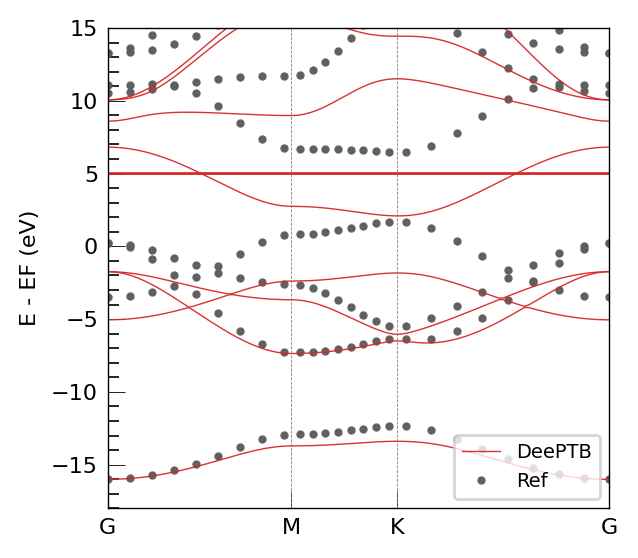

In [12]:
# AtomicData_options = {"r_max": 5.0,"er_max": 3.5, "oer_max":1.6, "pbc": True}
stru_data = '/Users/aisiqg/Desktop/work/github/DeePTB/examples/hBN_dftb/data/struct.vasp'
kpath_kwargs = {
        "task": "band",
        "kline_type":"abacus",
        "kpath":[
            [0, 0, 0, 50],
            [0.5, 0, 0, 50],
            [0.3333333, 0.3333333, 0, 50],
            [0, 0, 0, 1]
        ],
        "nel_atom":{"N":5,"B":3},
        "klabels":["G", "M", "K", "G"],
        "E_fermi":-12.798759460449219,
        "emin":-25,
        "emax":15,
        "ref_band": "/Users/aisiqg/Desktop/work/github/DeePTB/examples/hBN_dftb/data/kpath.0/eigenvalues.npy"
    }
bcal = Band(model=nnskf, 
            use_gui=False, 
            results_path='./', 
            device=nnskf.device)
eigenstatus = bcal.get_bands(data=stru_data, 
               kpath_kwargs=kpath_kwargs)
bcal.band_plot(ref_band = kpath_kwargs["ref_band"],
               E_fermi = -5,
               emin = -18,
               emax = 15)

DEEPTB INFO    KPOINTS  klist: 302 kpoints
DEEPTB INFO    The eigenvalues are already in data. will use them.
DEEPTB INFO    Calculating Fermi energy in the case of spin-degeneracy.
DEEPTB INFO    Estimated E_fermi: -3.838781952857971 based on the valence electrons setting nel_atom : {'Si': 4} .
DEEPTB INFO    use input fermi energy: -5, While the estimated value in line-mode is -3.838781952857971


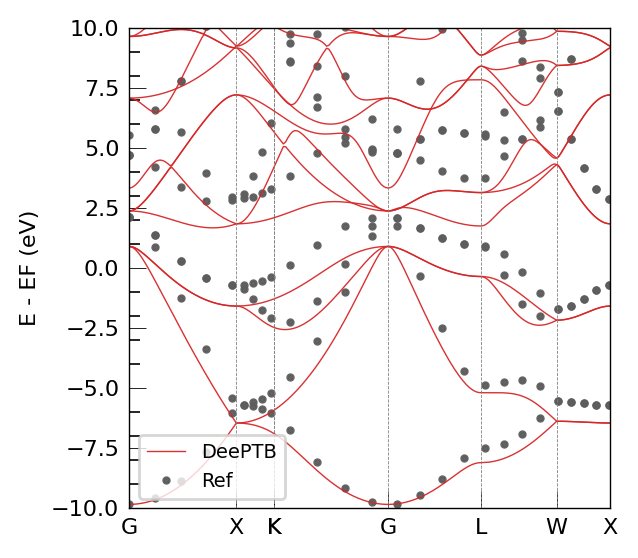

In [11]:
# AtomicData_options = {"r_max": 5.0,"er_max": 3.5, "oer_max":1.6, "pbc": True}
stru_data = '/Users/aisiqg/Desktop/work/github/DeePTB/examples/silicon/data/silicon.vasp'
kpath_kwargs =  {
        "task": "band",
        "kline_type":"abacus",
        "kpath":[[0.0000000000,  0.0000000000,   0.0000000000,   50],   
                [0.5000000000,   0.0000000000,   0.5000000000,   50],               
                [0.6250000000,   0.2500000000,   0.6250000000,   1],    
                [0.3750000000,   0.3750000000,   0.7500000000,   50],     
                [0.0000000000,   0.0000000000,   0.0000000000,   50],    
                [0.5000000000,   0.5000000000,   0.5000000000,   50],                
                [0.5000000000,   0.2500000000,   0.7500000000,   50],               
                [0.5000000000,   0.0000000000,   0.5000000000,   1 ]
                ],
        "klabels":["G","X","X/U","K","G","L","W","X"],
        "nel_atom":{"Si":4},
        "E_fermi":-4.722,
        "emin":-15,
        "emax":10,
        "ref_band": "/Users/aisiqg/Desktop/work/github/DeePTB/examples/silicon/data/kpath.0/eigenvalues.npy"
    }
bcal = Band(model=nnskf, 
            use_gui=False, 
            results_path='./', 
            device=nnskf.device)
eigenstatus = bcal.get_bands(data=stru_data, 
               kpath_kwargs=kpath_kwargs)
bcal.band_plot(ref_band = kpath_kwargs["ref_band"],
               E_fermi = -5,
               emin = -10,
               emax = 10)

In [10]:
common_options = {
    "basis": {
        "B": ["2s", "2p",'d*'],
        "N": ["2s", "2p",'d*'],
    },
    "device": "cpu",
    "dtype": "float32",
    "overlap": True,
    "seed": 3982377700
}
model_options = {
"dftbsk": {
        "skdata": './H_B_C_N_O_Si.pth'
    }
}
data_options = {
    "r_max": 2.6,
    "er_max": 2.6,
    "oer_max":1.6,
}

In [11]:
from dptb.nn.dftbsk import DFTBSK

Overwrite the r_max setting in the model with the r_max setting in the AtomicData_options: 4.22
This is very dangerous, please make sure you know what you are doing.


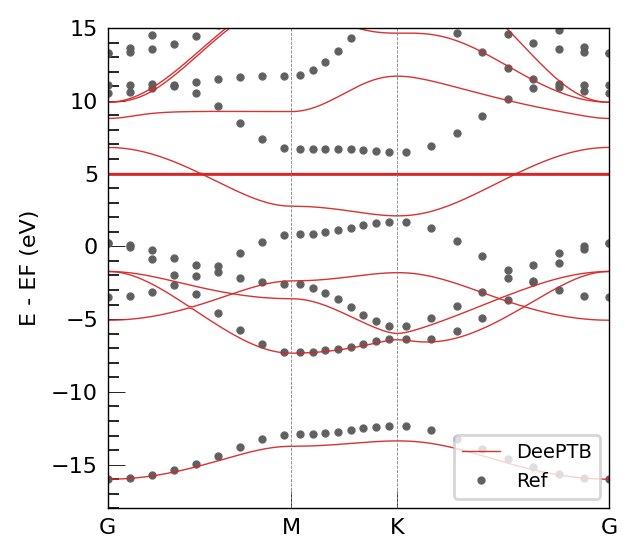

In [12]:
model = DFTBSK(**common_options, **model_options['dftbsk'])
# AtomicData_options = {"r_max": 5.0,"er_max": 3.5, "oer_max":1.6, "pbc": True}
stru_data = '/Users/aisiqg/Desktop/work/github/DeePTB/examples/hBN_dftb/data/struct.vasp'
kpath_kwargs = {
        "task": "band",
        "kline_type":"abacus",
        "kpath":[
            [0, 0, 0, 50],
            [0.5, 0, 0, 50],
            [0.3333333, 0.3333333, 0, 50],
            [0, 0, 0, 1]
        ],
        "nel_atom":{"N":5,"B":3},
        "klabels":["G", "M", "K", "G"],
        "E_fermi":-12.798759460449219,
        "emin":-25,
        "emax":15,
        "ref_band": "/Users/aisiqg/Desktop/work/github/DeePTB/examples/hBN_dftb/data/kpath.0/eigenvalues.npy"
    }
bcal = Band(model=model, 
            use_gui=False, 
            results_path='./', 
            device=model.device)
eigenstatus = bcal.get_bands(data=stru_data, 
               kpath_kwargs=kpath_kwargs,
               AtomicData_options={'r_max':4.22})

bcal.band_plot(ref_band = kpath_kwargs["ref_band"],
               E_fermi = -5,
               emin = -18,
               emax = 15)

In [13]:
nnskf.model_options['nnsk']['hopping']['rs']

{'H-H': 3.42,
 'H-B': 3.82,
 'B-H': 3.82,
 'H-C': 3.92,
 'C-H': 3.92,
 'H-N': 3.64,
 'N-H': 3.64,
 'H-O': 3.48,
 'O-H': 3.48,
 'H-Si': 4.55,
 'Si-H': 4.55,
 'B-B': 4.22,
 'B-C': 4.32,
 'C-B': 4.32,
 'B-N': 4.04,
 'N-B': 4.04,
 'B-O': 3.88,
 'O-B': 3.88,
 'B-Si': 4.95,
 'Si-B': 4.95,
 'C-C': 4.39,
 'C-N': 4.13,
 'N-C': 4.13,
 'C-O': 3.99,
 'O-C': 3.99,
 'C-Si': 5.02,
 'Si-C': 5.02,
 'N-N': 3.85,
 'N-O': 3.7,
 'O-N': 3.7,
 'N-Si': 4.76,
 'Si-N': 4.76,
 'O-O': 3.55,
 'O-Si': 4.63,
 'Si-O': 4.63,
 'Si-Si': 5.64}

DEEPTB INFO    KPOINTS  klist: 151 kpoints
DEEPTB INFO    The eigenvalues are already in data. will use them.
DEEPTB INFO    Calculating Fermi energy in the case of spin-degeneracy.
DEEPTB INFO    Estimated E_fermi: -4.688051462173462 based on the valence electrons setting nel_atom : {'N': 5, 'B': 3} .
DEEPTB INFO    use input fermi energy: -5, While the estimated value in line-mode is -4.688051462173462


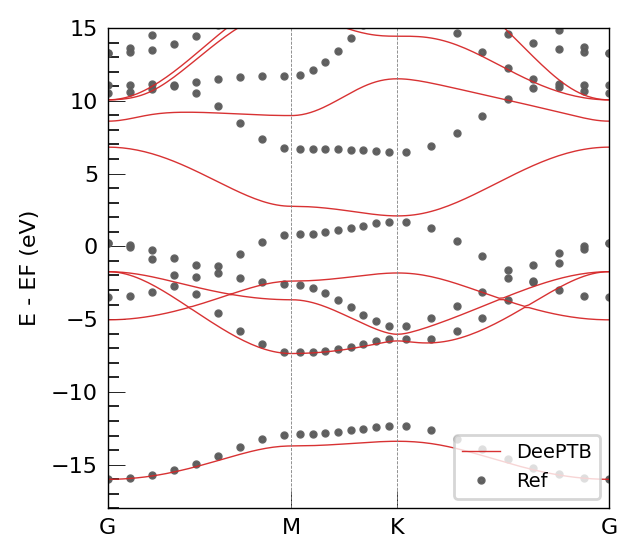

In [17]:
common_options = {
    "basis": {
        "B": ["s", "p"],
        "N": ["s", "p"],
    },
    "device": "cpu",
    "dtype": "float32",
    "overlap": True,
    "seed": 3982377700
}

model = build_model('./HBCNOSi.nnsk.model/nnsk_skf.pth',common_options=common_options)
# AtomicData_options = {"r_max": 5.0,"er_max": 3.5, "oer_max":1.6, "pbc": True}
stru_data = '/Users/aisiqg/Desktop/work/github/DeePTB/examples/hBN_dftb/data/struct.vasp'
kpath_kwargs = {
        "task": "band",
        "kline_type":"abacus",
        "kpath":[
            [0, 0, 0, 50],
            [0.5, 0, 0, 50],
            [0.3333333, 0.3333333, 0, 50],
            [0, 0, 0, 1]
        ],
        "nel_atom":{"N":5,"B":3},
        "klabels":["G", "M", "K", "G"],
        "E_fermi":-12.798759460449219,
        "emin":-25,
        "emax":15,
        "ref_band": "/Users/aisiqg/Desktop/work/github/DeePTB/examples/hBN_dftb/data/kpath.0/eigenvalues.npy"
    }
bcal = Band(model=model, 
            use_gui=False, 
            results_path='./', 
            device=model.device)
eigenstatus = bcal.get_bands(data=stru_data, 
               kpath_kwargs=kpath_kwargs)

bcal.band_plot(ref_band = kpath_kwargs["ref_band"],
               E_fermi = -5,
               emin = -18,
               emax = 15)